In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import datetime as dt
import squarify 
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
# load data
df = pd.read_csv("Online_Retail.csv")

In [3]:
# visualize data 
df.describe(include = "all")

,TransactionNo,MerchandiseCode,Quan,TransactionDate,ItemPrice,UserID
count,541909,541909,541909.000000,541909,541909.000000,4.068290e+05
unique,25899,4070,NaN,286,NaN,NaN
top,573585,85123A,NaN,2020-9-1,NaN,NaN
freq,1114,2313,NaN,9317,NaN,NaN
mean,NaN,NaN,9.551611,NaN,4.611127,1.920313e+04
std,NaN,NaN,218.080464,NaN,96.759853,9.303983e+04
min,NaN,NaN,-80995.000000,NaN,-11062.060000,1.234600e+04
25%,NaN,NaN,1.000000,NaN,1.250000,1.396900e+04
50%,NaN,NaN,3.000000,NaN,2.080000,1.515900e+04
75%,NaN,NaN,10.000000,NaN,4.130000,1.680600e+04


In [4]:
# delete samples with null values 
df_cleaned = df.dropna(axis=0, subset=["UserID"])

In [5]:
# Turn the warnings off
pd.options.mode.chained_assignment = None

In [6]:
# transofrming datetime
df_cleaned.loc[:, "TransactionDate"] = pd.to_datetime(df_cleaned.loc[:,"TransactionDate"])

In [7]:
# add the 'total consumption' into data
df_cleaned.loc[:, "TotalConsumption"] = df_cleaned["Quan"] * df_cleaned["ItemPrice"]

In [8]:
# delete data with negative quantity
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.Quan < 0].index)

In [9]:
# view data after clearing 
df_cleaned.head(10)

,TransactionNo,MerchandiseCode,Quan,TransactionDate,ItemPrice,UserID,TotalConsumption
0,29138841,85123A,8,2020-09-01,2.76,208163.0,22.08
1,29138841,71053,8,2020-09-01,2.12,208163.0,16.96
2,29138841,84406B,8,2020-09-01,5.12,208163.0,40.96
3,29138841,84029G,8,2020-09-01,4.33,208163.0,34.64
4,29138841,84029E,8,2020-09-01,3.39,208163.0,27.12
5,29138841,22752,2,2020-09-01,7.65,208163.0,15.30
6,29138841,21730,6,2020-09-01,4.25,208163.0,25.50
7,29326612,22633,5,2020-09-01,1.85,208163.0,9.25
8,29326612,22632,1,2020-09-01,5.12,208163.0,5.12
9,291388311,84879,32,2020-09-01,1.69,212862.0,54.08


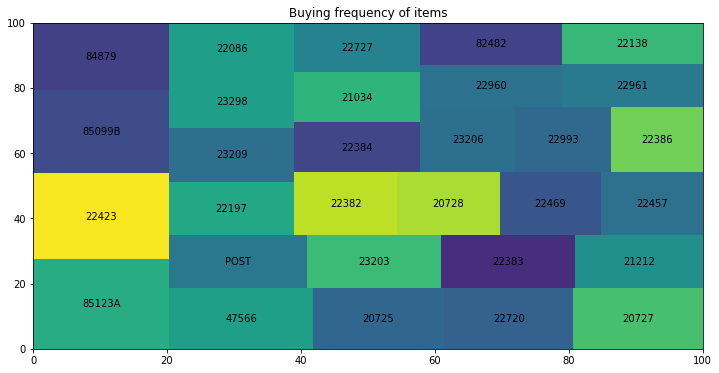

In [10]:
# get the 30 most frequently bought items
labels = df_cleaned["MerchandiseCode"].value_counts().index.tolist()[0:30]
sizes = df["MerchandiseCode"].value_counts().tolist()[0:30]

plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, label=labels)

plt.title("Buying frequency of items")
plt.show()

In [11]:
# unstack the dataset for apriori algorithm
unstack = df_cleaned.pivot_table(index='TransactionNo', columns='MerchandiseCode', values='TotalConsumption', aggfunc='sum')

In [12]:
# visualize the unstacked dataset
unstack.head(20)

MerchandiseCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
TransactionNo,,,,,,,,,,,,,,,,,,,,,
22345123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22753781,40.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
229376172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291388311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29138841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29326612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# delete the last columns 
df1 = unstack.drop(columns=['BANK CHARGES', 'C2', 'DOT', 'M', 'PADS', 'POST'])

In [14]:
# visualize data after deletion
df1.head()

MerchandiseCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
TransactionNo,,,,,,,,,,,,,,,,,,,,,
22345123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22753781,40.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229376172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291388311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29138841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# build the apriori model
model = apriori(df1, min_support=0.3, min_confidence=0.2, min_lift=0.2, min_length=2)

In [23]:
# get the result 
result = list(model)
result

[RelationRecord(items=frozenset({'0'}), support=0.4107679693905439, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.4107679693905439, lift=1.0)]),
 RelationRecord(items=frozenset({'1'}), support=0.48647171358294616, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.48647171358294616, lift=1.0)]),
 RelationRecord(items=frozenset({'2'}), support=0.7428259087182291, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2'}), confidence=0.7428259087182291, lift=1.0)]),
 RelationRecord(items=frozenset({'3'}), support=0.3815250068324679, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'3'}), confidence=0.3815250068324679, lift=1.0)]),
 RelationRecord(items=frozenset({'4'}), support=0.3561082262913364, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'4'}), confidence=0.3561082262913364, lift=1